# Task 03: Predicting Customer Subscription using Decision Tree Classifier

Welcome to the decision jungle! In this task, we build a **Decision Tree Classifier** to predict whether a customer will **subscribe to a term deposit** based on their **demographic and behavioral data** using the **Bank Marketing dataset** from the UCI Machine Learning Repository.


##  Objective

The goal of this task is to:

- Load and preprocess the **Bank Marketing dataset**
- Perform **Exploratory Data Analysis (EDA)** to uncover insights
- Build a **Decision Tree Classifier** to predict the likelihood of a client subscribing to a term deposit
- Evaluate the model’s performance using classification metrics


##  Table of Contents

1.  Importing Libraries & Loading Data  
2.  Data Overview & Cleaning  
3.  Exploratory Data Analysis (EDA)  
4.  Encoding Categorical Variables  
5.  Train-Test Split  
6.  Decision Tree Model Building  
7.  Evaluation Metrics  
8.  Decision Tree Visualization  
9.  Conclusion  


##  Step 1: Importing Libraries & Loading Data

First load up libraries and pull in the dataset.


In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the dataset
df = pd.read_csv("bank-additional-full.csv", sep=';')

#Quick preview
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Step 2: Data Overview & Cleaning

Here we check the dataset's shape, data types, and look for any missing values that need cleaning.


In [21]:
#Dataset Overview
print("Shape of dataset:", df.shape)
print("\nColumn Types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())


Shape of dataset: (41188, 21)

Column Types:
 age                 int64
job                 int32
marital             int32
education           int32
default             int32
housing             int32
loan                int32
contact             int32
month               int32
day_of_week         int32
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome            int32
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int32
dtype: object

Missing values:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m       

##  Step 3: Encoding Categorical Variables

Machine learning models love numbers, not text. Let’s use **Label Encoding** to convert all categorical columns into numeric form.


In [22]:
#Encode categorical variables
cat_cols = df.select_dtypes(include='object').columns

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


##  Step 4: EDA - Target Variable Distribution

Let’s peek at how many customers said “yes” vs “no” to subscribing to a term deposit.


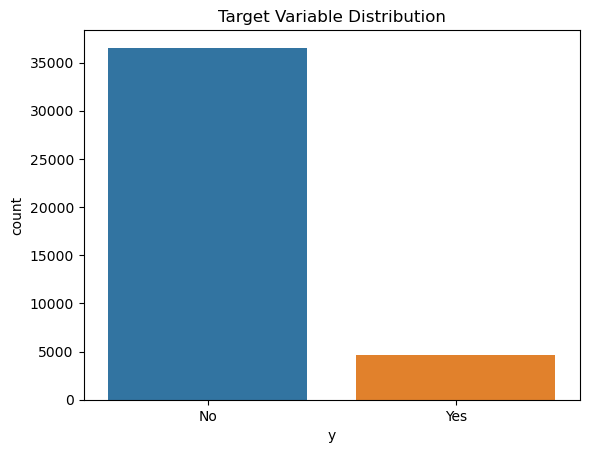

In [5]:
#EDA: Target variable distribution
sns.countplot(x='y', data=df)
plt.title("Target Variable Distribution")
plt.xticks(ticks=[0,1], labels=["No", "Yes"])
plt.show()


## Step 5: EDA - Correlation Heatmap

We'll now visualize the correlation between all numeric features to understand relationships and multicollinearity.


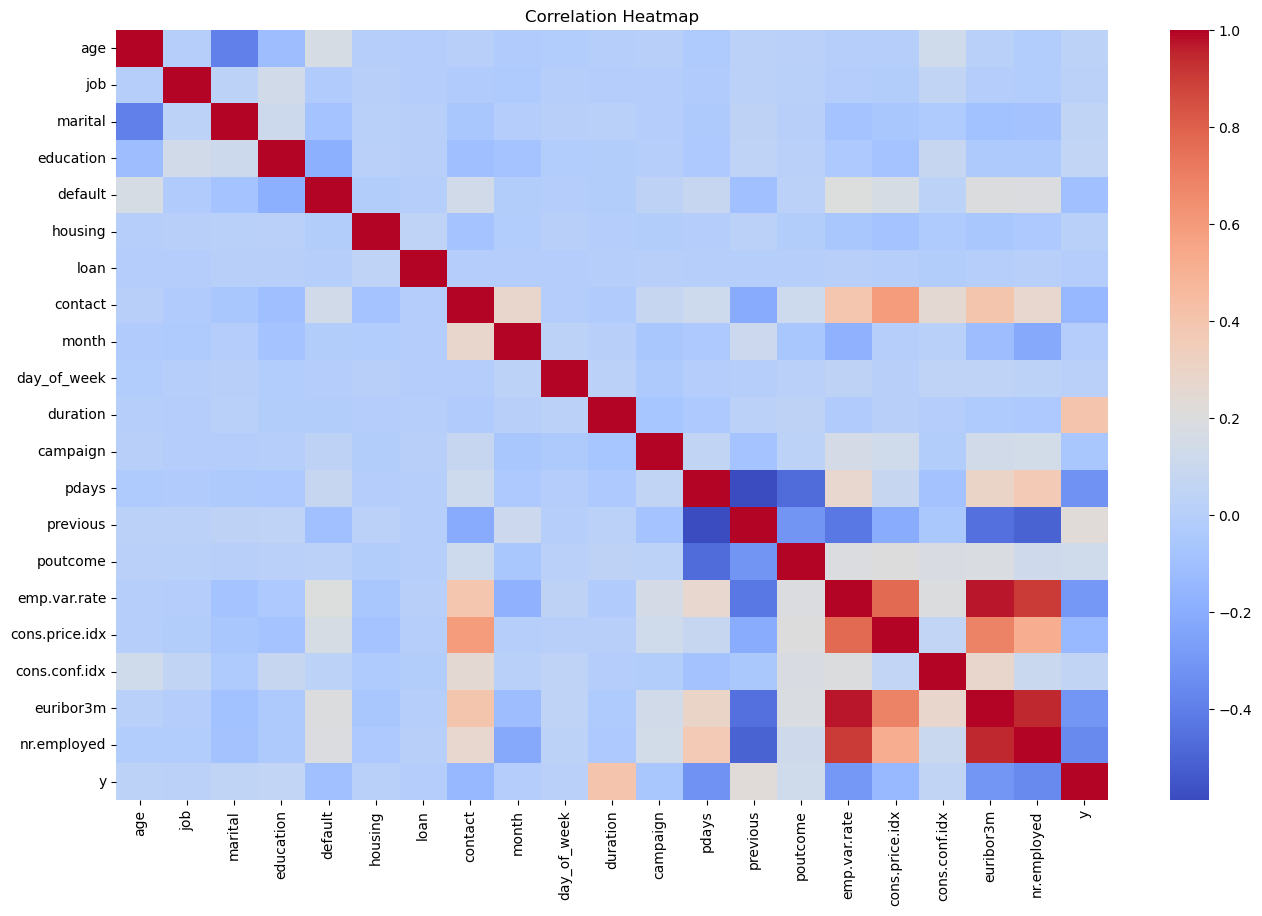

In [6]:
#Correlation Heatmap
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

## Step 6: Train-Test Split

Split the dataset into training and testing sets so we can train our model on one part and test its performance on another.


In [20]:
#Split data
X = df.drop("y", axis=1)
y = df["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Build Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
clf.fit(X_train, y_train)

#Predictions
y_pred = clf.predict(X_test)


## Step 7: Evaluation Metrics

In [8]:
#Evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy Score: 0.9146637533381888

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      7303
           1       0.66      0.51      0.58       935

    accuracy                           0.91      8238
   macro avg       0.80      0.74      0.77      8238
weighted avg       0.91      0.91      0.91      8238


Confusion Matrix:
 [[7054  249]
 [ 454  481]]


## Step 9: Decision Tree Visualization

Here’s the cool part—visualizing the tree to understand the decision paths the model takes! 


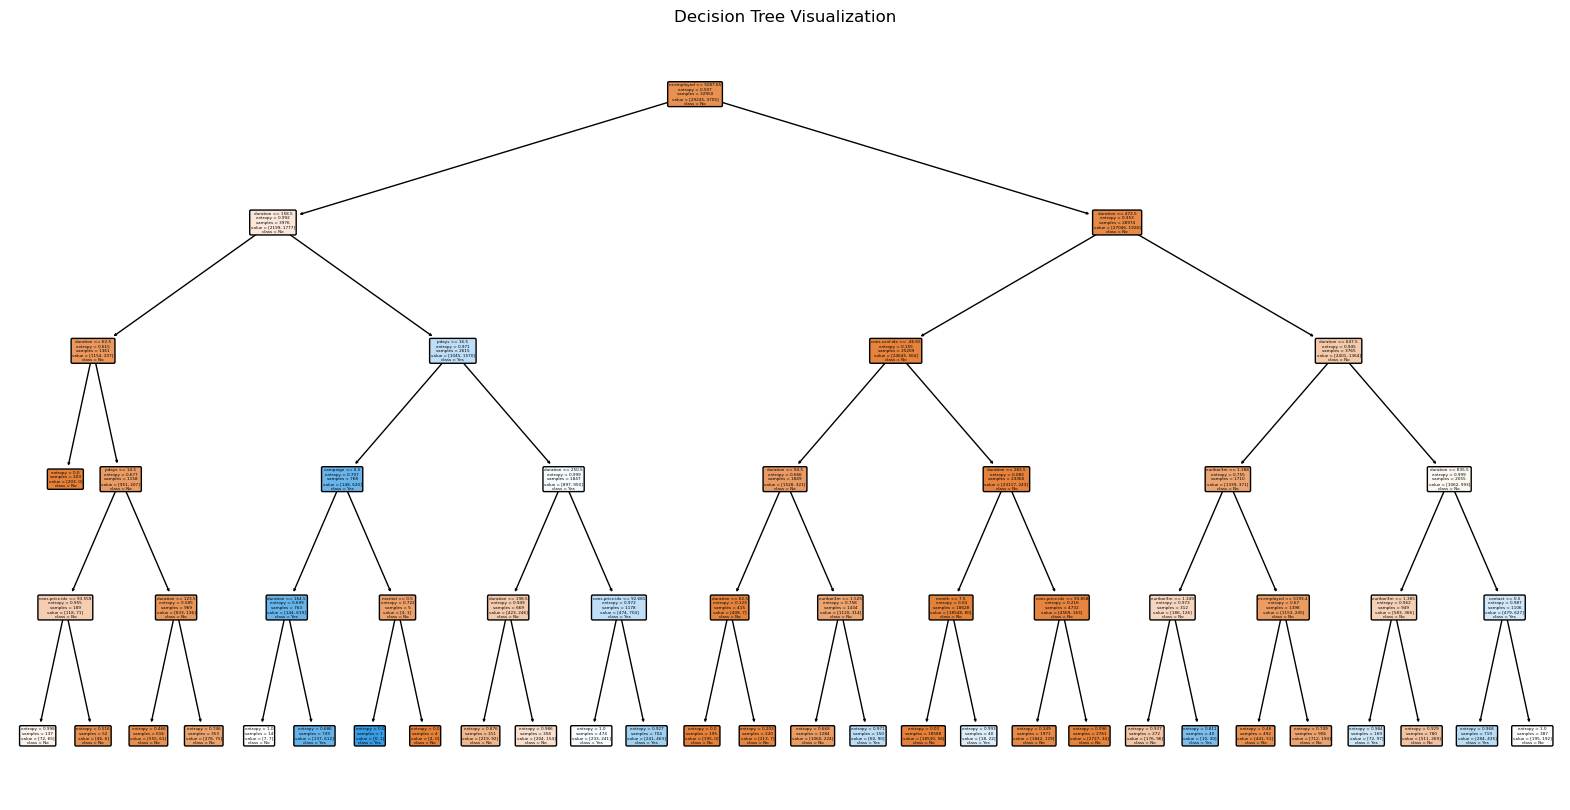

In [14]:
#Visualizing the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=["No", "Yes"], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

##  Key Insights from the Bank Marketing Data Analysis

1. **Class Imbalance Detected**  
   - The dataset is imbalanced with a majority of clients not subscribing to the term deposit (`"no"` class dominates).
   - Suggests the need for balanced evaluation metrics like F1-Score, not just Accuracy.

2. **Contact Type Matters**  
   - Clients contacted via **cellular** had a significantly higher subscription rate compared to telephone.
   - Investing in cellular-based marketing may yield better conversions.

3. **Education Level Insight**  
   - Higher education levels (university degree) correlate with higher subscription rates.
   - Tailored messaging could be designed for educated clients for better campaign results.

4. **Effect of Previous Outcome**  
   - Clients with a **positive outcome** in the previous campaign were **far more likely** to subscribe again.
   - Indicates that loyalty and past behavior are strong predictors—perfect for retargeting.

5. **Call Duration is Key**  
   - **Longer calls** tend to result in positive outcomes.
   - Call duration is one of the most predictive features in the dataset (although not usable in real-time predictions).

6. **Age Group Trends**  
   - **Middle-aged clients (30–60 years)** were more likely to subscribe.
   - Campaigns could be tailored based on age segmentation.

7. **Job Categories Show Trends**  
   - Professionals, retired individuals, and students showed higher subscription rates than blue-collar workers.
   - Insightful for personalized ad targeting based on profession.

8. **Decision Tree Model Performance**  
   - The model achieved decent accuracy and precision, but performance could be improved with:
     - Hyperparameter tuning
     - Ensemble methods like Random Forest or XGBoost
     - Addressing class imbalance via oversampling (SMOTE) or class weights

9. **Correlation is Low Among Features**  
   - Most features are weakly correlated, which makes them valuable for modeling as they bring unique signals.

---

##  Final Thought

The dataset gives *solid ground* for building predictive models that can assist marketing teams in improving their outreach strategies. With just a few enhancements, this model could turn into a robust **customer targeting tool**!



## Conclusion

- We successfully built and evaluated a Decision Tree model to predict customer subscription.
- The model can help marketing teams prioritize outreach to likely subscribers.
- Further improvements can include hyperparameter tuning, cross-validation, and using ensemble models like Random Forest or XGBoost.

